In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np

/home/dawid/.local/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'DataError' from 'pandas.core.base' (/home/dawid/.local/lib/python3.11/site-packages/pandas/core/base.py)

In [16]:
df_train = pd.read_csv('../data/interim/train.csv')
df_test = pd.read_csv('../data/interim/test.csv')

In [ ]:
#descriptive statistics
pandas_profiling.ProfileReport(df_train)

In [18]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,HasMiscFeature
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,Inside,...,0,NF,0,2,2008,WD,Normal,208500.0,1.0,1.0
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,FR2,...,0,NF,0,5,2007,WD,Normal,181500.0,1.0,1.0
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,Inside,...,0,NF,0,9,2008,WD,Normal,223500.0,1.0,1.0
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,Corner,...,0,NF,0,2,2006,WD,Abnorml,140000.0,1.0,1.0
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,FR2,...,0,NF,0,12,2008,WD,Normal,250000.0,1.0,1.0


## MSSubClass

In [19]:
df_train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

<AxesSubplot: xlabel='MSSubClass', ylabel='SalePrice'>

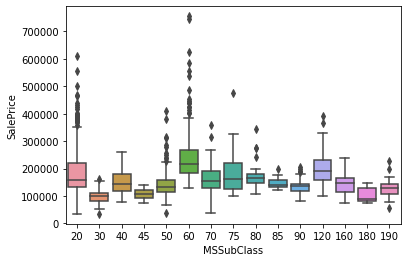

In [21]:
sns.boxplot(data=df_train, x='MSSubClass', y='SalePrice')

In [27]:
df_train["MSSubClass"] = df_train["MSSubClass"].apply(str)

In [28]:
df_train["MSSubClass"]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

## MSZoning - going to change the name of the 'C (all)' category for better readability

In [30]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot: xlabel='MSZoning', ylabel='SalePrice'>

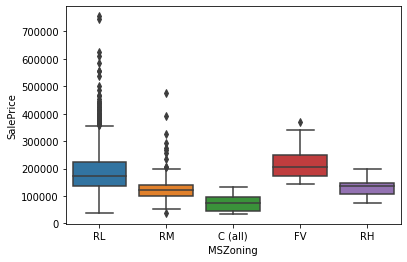

In [31]:
sns.boxplot(data=df_train, x='MSZoning', y='SalePrice')

In [35]:
df_train["MSZoning"] = df_train["MSZoning"].apply(lambda x: 'C' if x == "C (all)" else x)

## LotFrontage - remove outliers

<AxesSubplot: xlabel='LotFrontage', ylabel='SalePrice'>

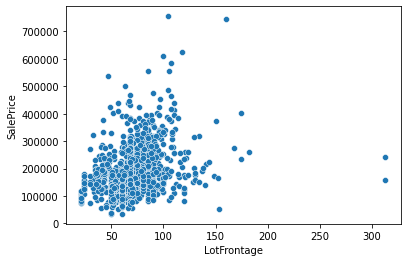

In [36]:
sns.scatterplot(data=df_train, x='LotFrontage', y='SalePrice')

<AxesSubplot: xlabel='LotFrontage', ylabel='SalePrice'>

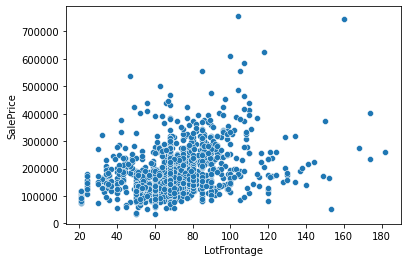

In [43]:
df_train.drop(df_train[df_train["LotFrontage"] > 300].index, inplace=True)
sns.scatterplot(data=df_train, x='LotFrontage', y='SalePrice')

## LotArea - remove outliers

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

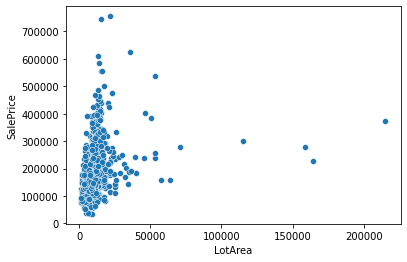

In [37]:
sns.scatterplot(data=df_train, x='LotArea', y='SalePrice')

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

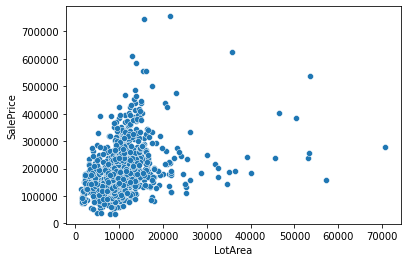

In [44]:
df_train.drop(df_train[df_train["LotArea"] > 100_000].index, inplace=True)
sns.scatterplot(data=df_train, x='LotArea', y='SalePrice')

## Street - drop

In [46]:
df_train.Street.value_counts()

Pave    1449
Grvl       5
Name: Street, dtype: int64

In [47]:
df_train.drop("Street", axis=1, inplace=True)

## Alley

In [48]:
df_train.Alley.value_counts()

NoAlley    1363
Grvl         50
Pave         41
Name: Alley, dtype: int64

<AxesSubplot: xlabel='Alley', ylabel='SalePrice'>

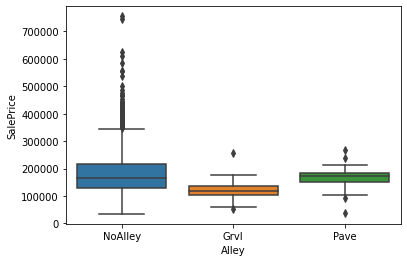

In [49]:
sns.boxplot(data=df_train, x='Alley', y='SalePrice')

## LotShape

In [51]:
df_train.LotShape.value_counts()

Reg    925
IR1    483
IR2     38
IR3      8
Name: LotShape, dtype: int64

<AxesSubplot: xlabel='LotShape', ylabel='SalePrice'>

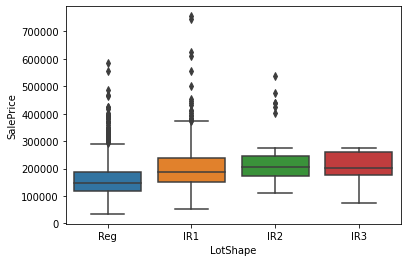

In [52]:
sns.boxplot(data=df_train, x='LotShape', y='SalePrice')

## LandContour

In [53]:
df_train.LandContour.value_counts()

Lvl    1311
Bnk      62
HLS      48
Low      33
Name: LandContour, dtype: int64

<AxesSubplot: xlabel='LandContour', ylabel='SalePrice'>

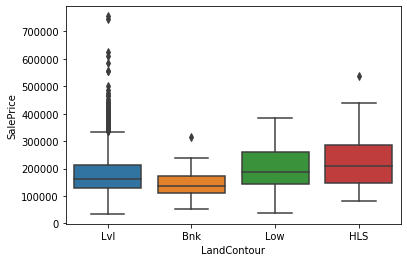

In [54]:
sns.boxplot(data=df_train, x='LandContour', y='SalePrice')

## LotConfig

In [55]:
df_train.LotConfig.value_counts()

Inside     1050
Corner      261
CulDSac      92
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot: xlabel='LotConfig', ylabel='SalePrice'>

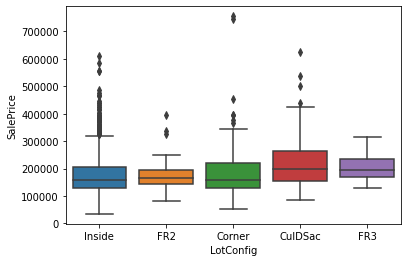

In [56]:
sns.boxplot(data=df_train, x='LotConfig', y='SalePrice')

MSSubClass
20     533
60     298
50     143
120     87
30      69
160     63
70      60
80      58
90      52
190     29
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning
RL    1145
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64 

Alley
NoAlley    1363
Grvl         50
Pave         41
Name: Alley, dtype: int64 

LotShape
Reg    925
IR1    483
IR2     38
IR3      8
Name: LotShape, dtype: int64 

LandContour
Lvl    1311
Bnk      62
HLS      48
Low      33
Name: LandContour, dtype: int64 

LotConfig
Inside     1050
Corner      261
CulDSac      92
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

LandSlope
Gtl    1381
Mod      64
Sev       9
Name: LandSlope, dtype: int64 

Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      3

<ipython-input-68-972ca78715db>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(count)


Heating
GasA     1423
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64 

HeatingQC
Ex    738
TA    426
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64 

CentralAir
Y    1359
N      95
Name: CentralAir, dtype: int64 

Electrical
SBrkr    1329
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 

KitchenQual
TA    733
Gd    583
Ex     99
Fa     39
Name: KitchenQual, dtype: int64 

Functional
Typ     1354
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64 

FireplaceQu
NF    690
Gd    376
TA    311
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 

GarageType
Attchd     864
Detchd     387
BuiltIn     88
NG          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

GarageFinish
Unf    604
RFn    420
Fin    349
NG      81
Name: GarageFinish, dtype: int64 

GarageQual
TA    1305
NG      81
Fa     

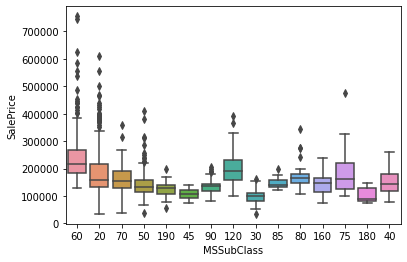

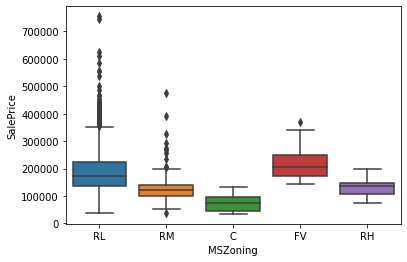

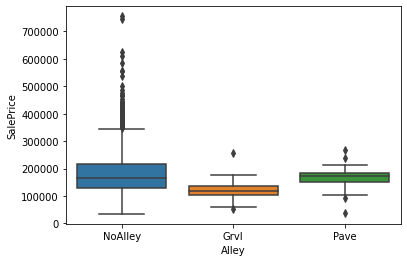

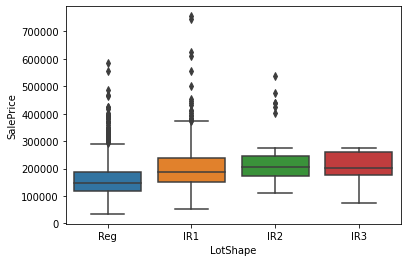

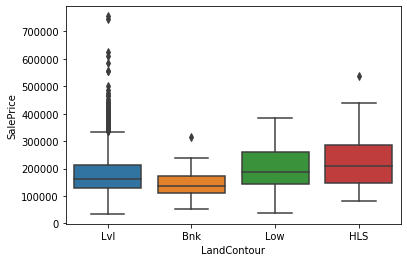

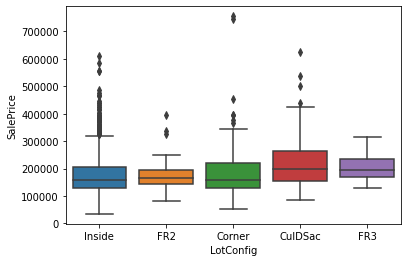

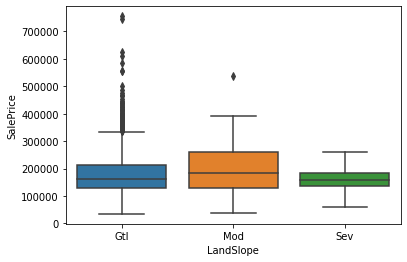

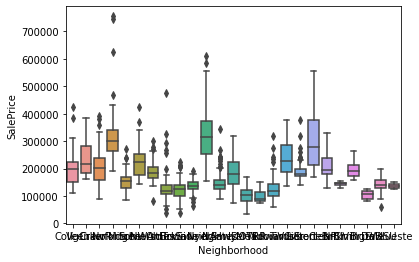

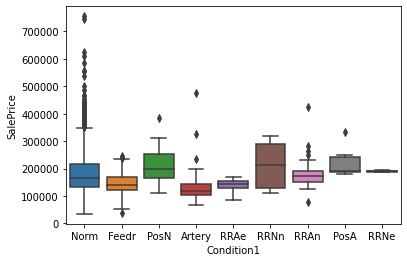

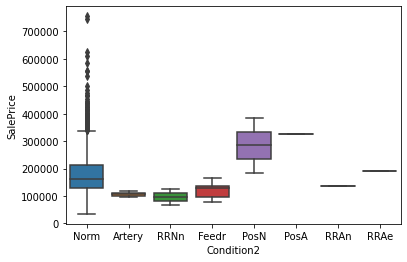

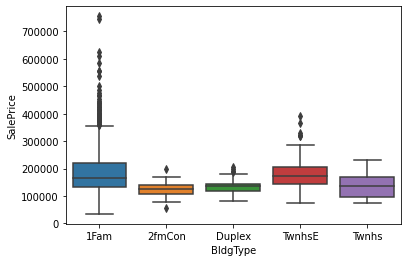

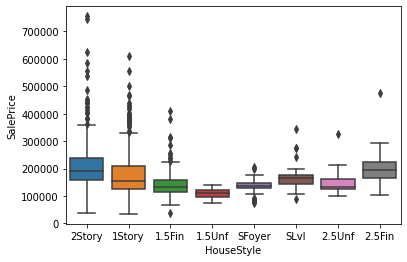

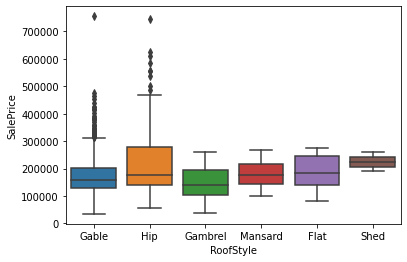

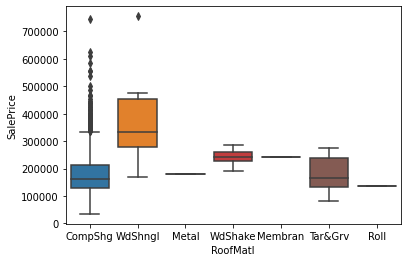

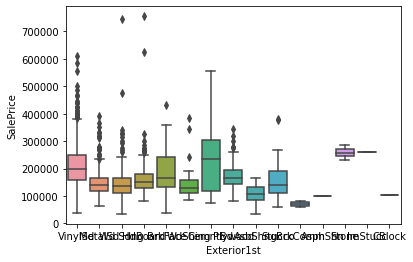

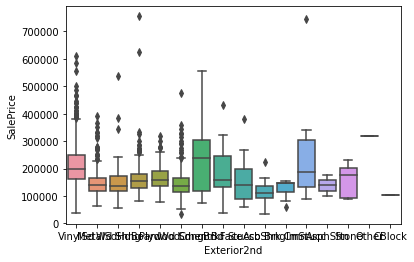

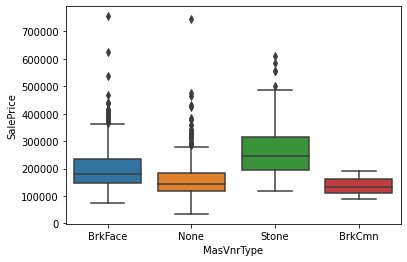

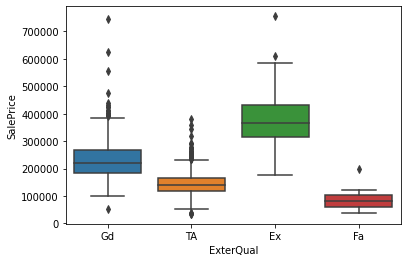

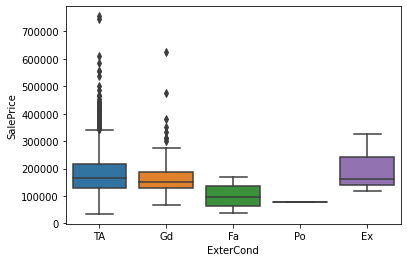

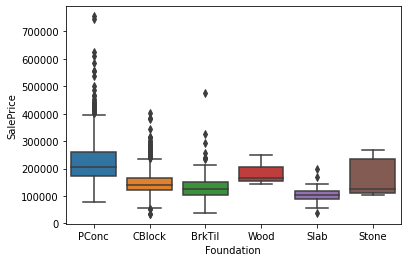

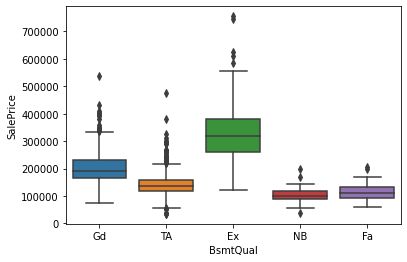

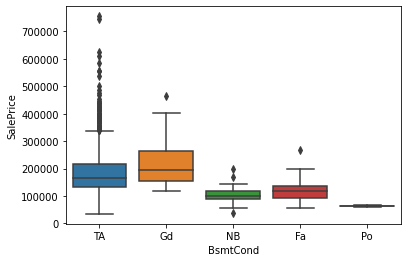

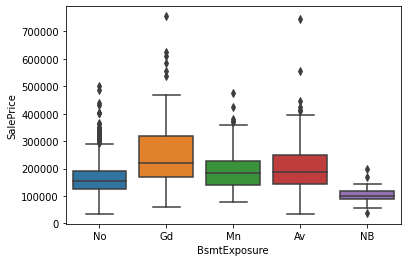

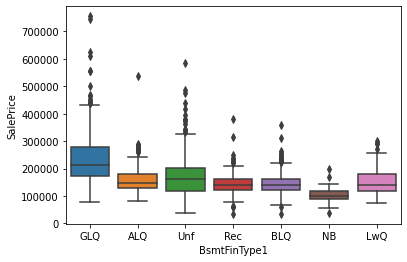

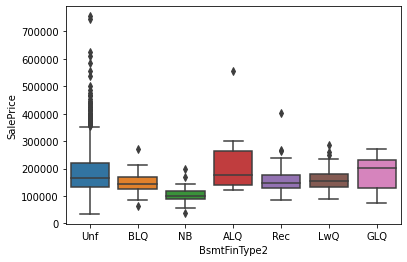

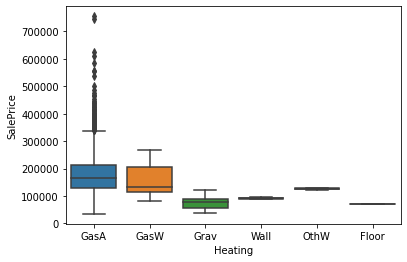

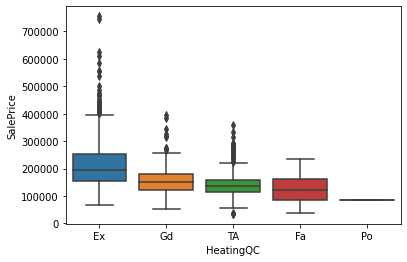

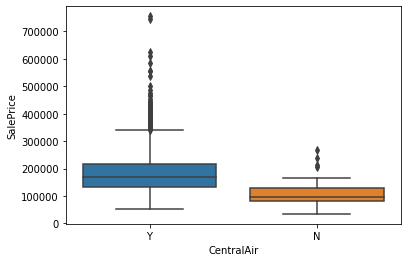

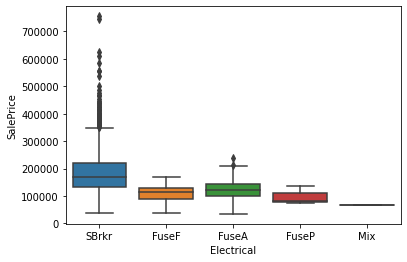

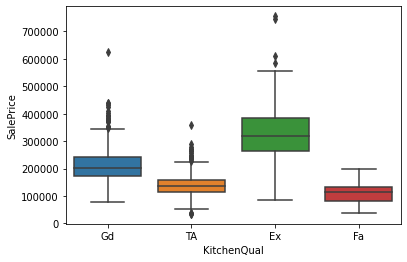

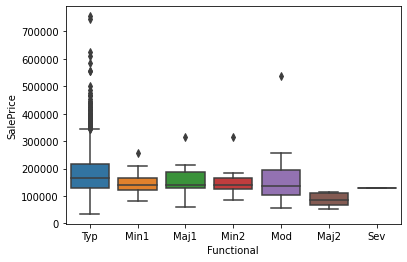

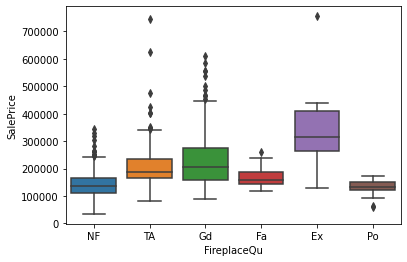

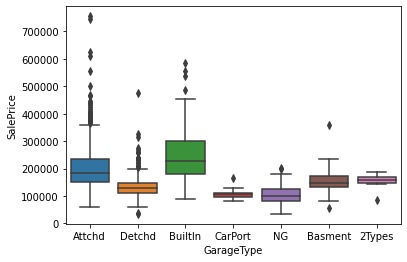

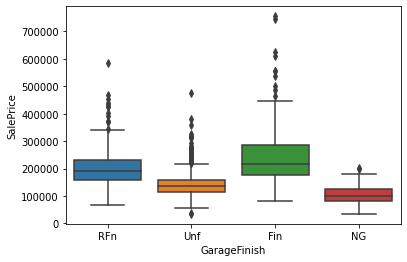

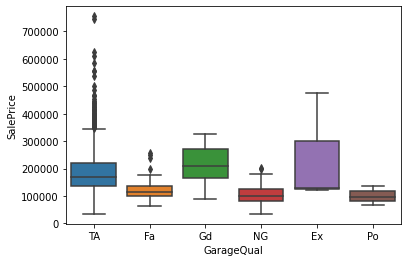

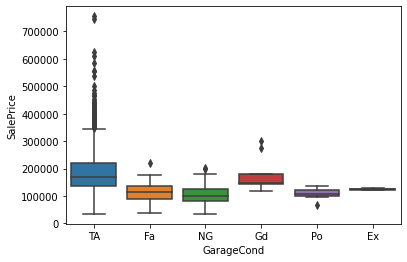

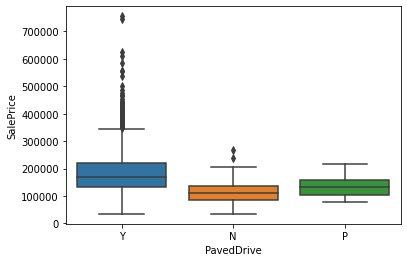

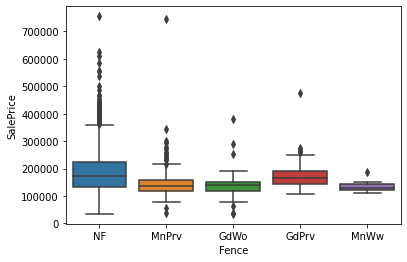

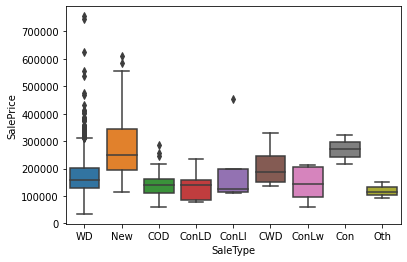

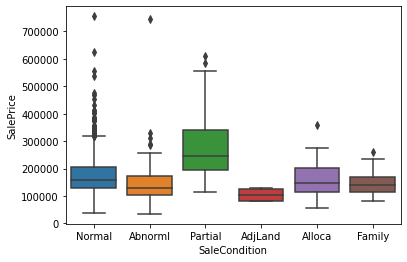

In [68]:
count = 0
for column, dtype in zip(df_train.columns, df_train.dtypes):
    if dtype == 'object':
        print(column)
        print(df_train[column].value_counts(), "\n")
        plt.figure(count)
        sns.boxplot(data=df_train, x=column, y='SalePrice')
        count += 1

Id
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces


<ipython-input-69-248c44e80b6c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(count)


GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal
MoSold
YrSold
SalePrice
HasPool
HasMiscFeature


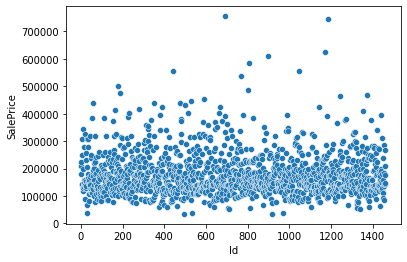

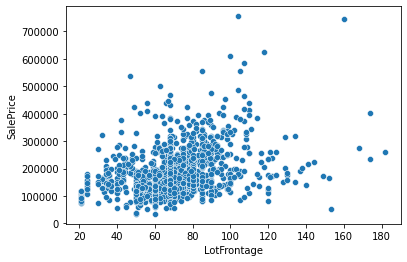

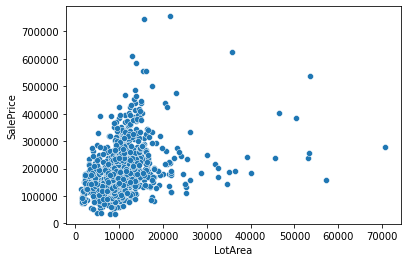

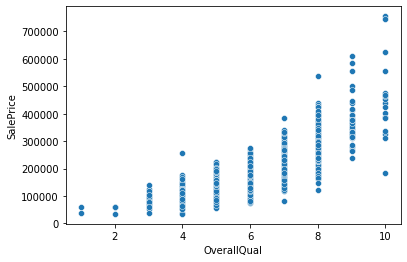

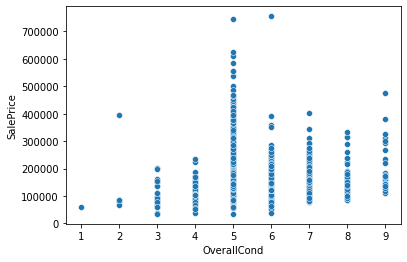

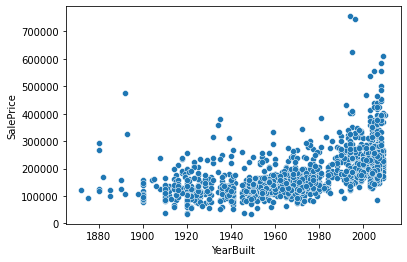

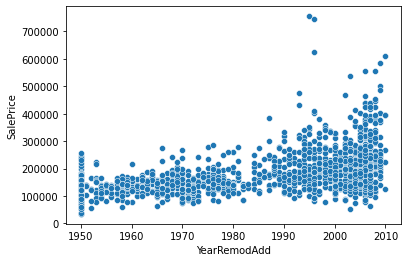

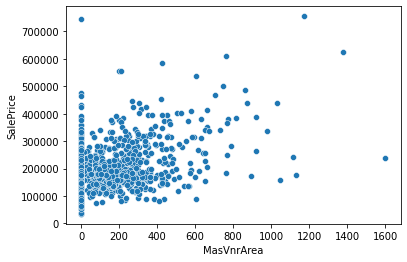

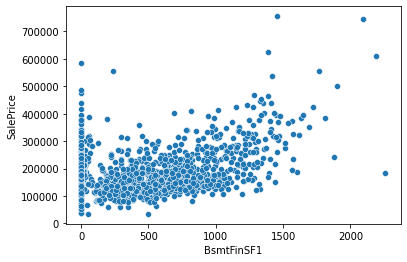

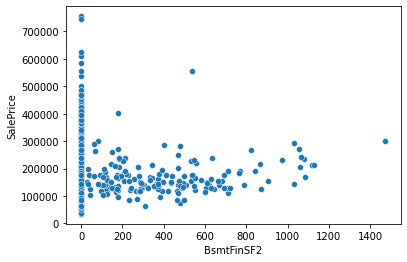

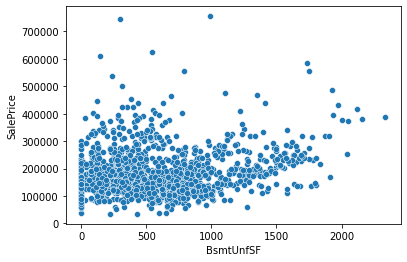

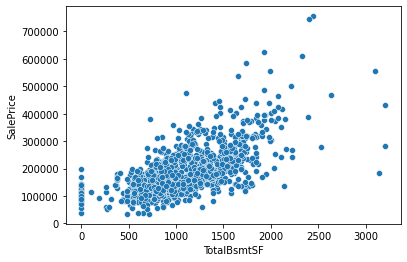

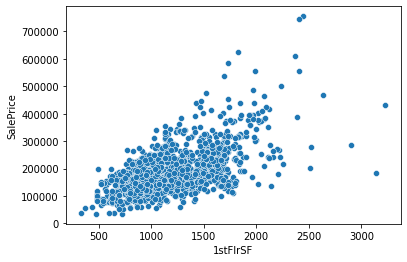

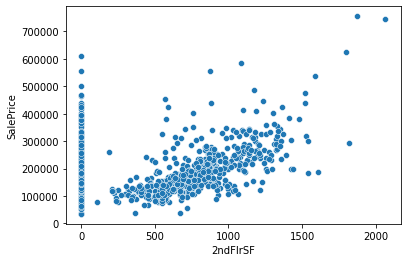

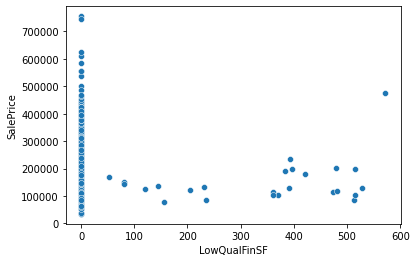

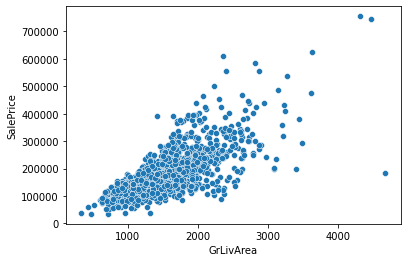

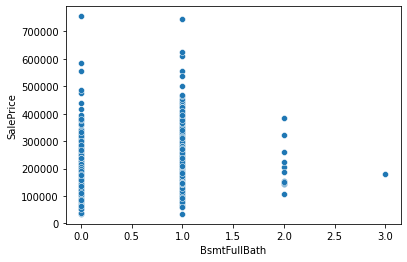

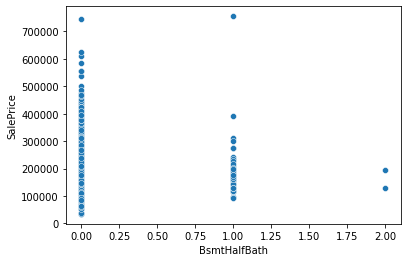

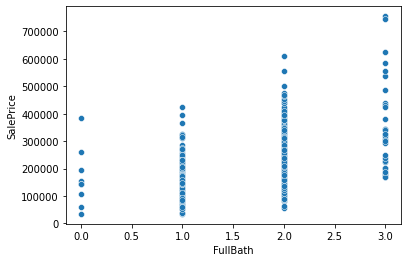

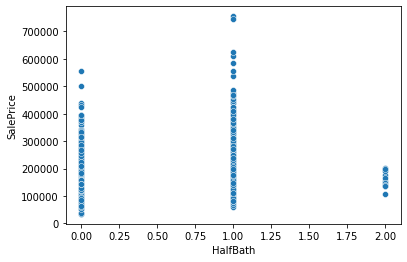

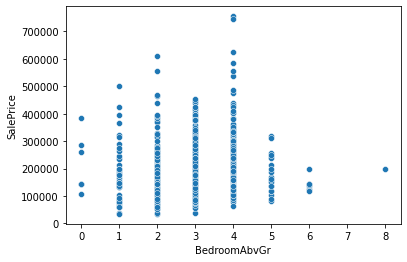

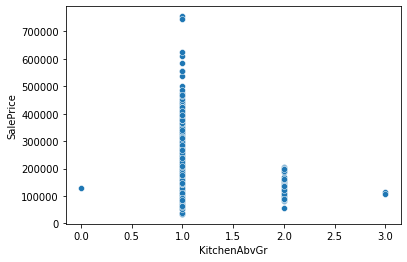

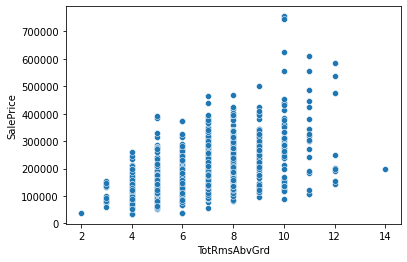

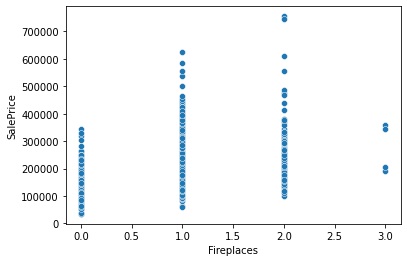

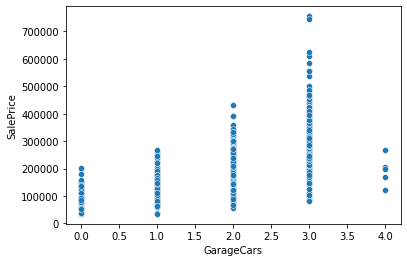

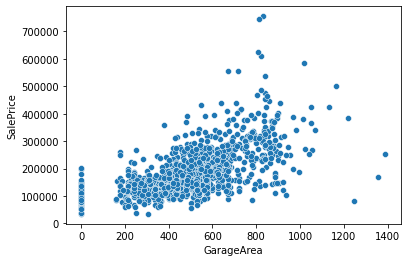

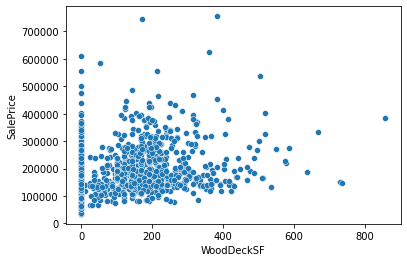

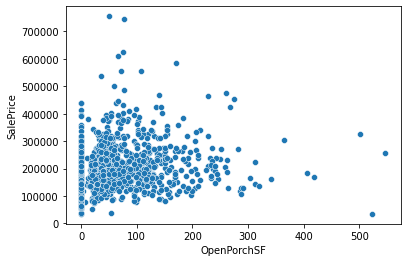

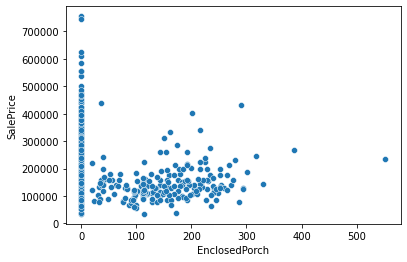

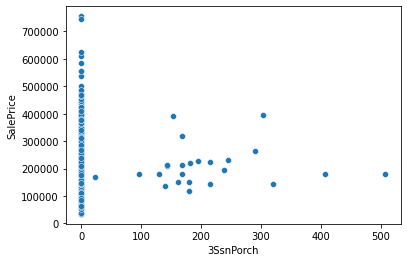

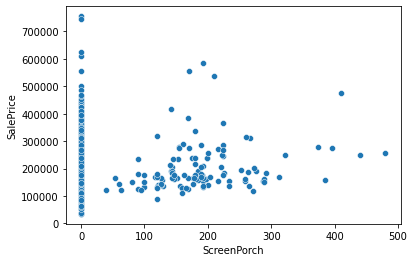

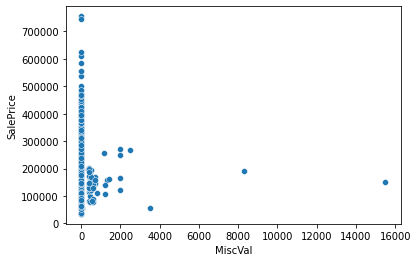

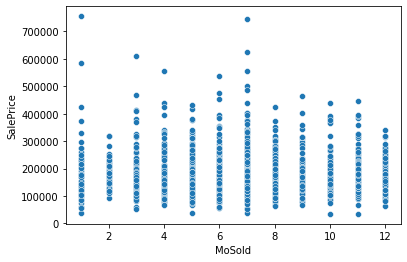

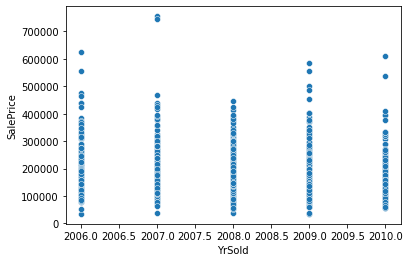

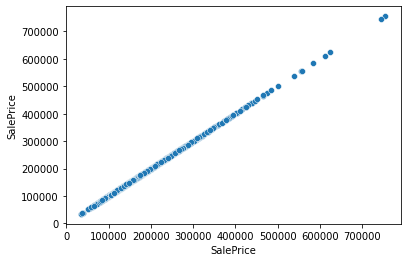

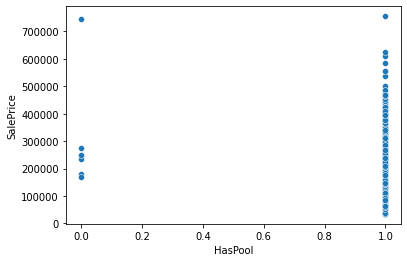

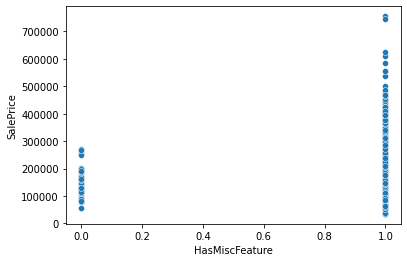

In [69]:
count = 0
for column, dtype in zip(df_train.columns, df_train.dtypes):
    if dtype != 'object':
        print(column)
        plt.figure(count)
        sns.scatterplot(data=df_train, x=column, y='SalePrice')
        count += 1

In [70]:
# Drop BsmtFinSF2, most values are zero and not a good predictor os SalePrice
df_train.drop("BsmtFinSF2", axis=1, inplace=True)

In [72]:
# Drop LowQualFinSF, most values are zero and not a good predictor os SalePrice
df_train.drop("LowQualFinSF", axis=1, inplace=True)